# Nivell 1

Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

In [370]:
import mysql.connector
import pandas as pd

# Connexió
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="skycaster"
)

print("Connexió correcta!Estàs connectat a la base de dades skycaster.")

# Crear cursor
cursor = conn.cursor()

Connexió correcta!Estàs connectat a la base de dades skycaster.


In [371]:
import warnings
warnings.filterwarnings(
    "ignore",
    message="pandas only supports SQLAlchemy"
) # per evitar el warning de pandas

In [372]:
cursor.execute("SHOW TABLES")
taules = cursor.fetchall()

for t in taules:
    nom_taula = t[0]
    globals()[f"df_{nom_taula}"] = pd.read_sql(f"SELECT * FROM {nom_taula}", conn)
    print(f"Carregada taula: df_{nom_taula}")

Carregada taula: df_company
Carregada taula: df_credit_card
Carregada taula: df_estat_targetes
Carregada taula: df_product
Carregada taula: df_transaction_products
Carregada taula: df_transactions
Carregada taula: df_users


In [373]:
cursor.close() # tancar el cursor
conn.close() #tancar la connexió

Ara analitzarem:el tipus de dades que tenim a les taules, el nombre de registres de cadascuna per fer el anàlisis exploratori posterior.  

Ens interessa conèixer les variables numèriques que tenim:
a) df_company: totes categòriques  
b) df_credit_card: totes categòriques (expiring_date es pot convertir a DATE si ens interesa)  
c) df_estat_targetes: totes categòriques  
d) df_transactions: totes categòriques excepte lat, longitude i amount (numèriques) i timestamp (temporal/Datetime)  
e) df_product: weight es numèrica, price la convertim en numèrica desprès de treure-li el ~simbol ($) y la resta són categòriques  
f) df_users: totes son categòriques excepte birth_date que es pot convertir a DATE si ens interesa)  

Variables numèriques: pes, preu i facturació (weight, price & amount)

In [374]:
df_company.dtypes

id_company      object
company_name    object
phone           object
email           object
country         object
website         object
dtype: object

In [375]:
df_company.shape

(100, 6)

In [376]:
df_credit_card.dtypes

id_card          object
user_id          object
iban             object
pan              object
pin              object
cvv              object
track1           object
track2           object
expiring_date    object
dtype: object

In [377]:
df_credit_card.shape

(5000, 9)

In [378]:
df_estat_targetes.dtypes

card_id          object
estat_targeta    object
dtype: object

In [379]:
df_estat_targetes.shape

(5000, 2)

In [380]:
df_transactions.dtypes

id_transactions            object
card_id                    object
business_id                object
timestamp          datetime64[ns]
amount                    float64
declined                    int64
product_id                 object
user_id                    object
lat                       float64
longitude                 float64
dtype: object

In [381]:
df_transactions.shape

(100000, 10)

In [382]:
df_product.dtypes #camp price hauria de ser numèric

id_product      object
product_name    object
price           object
colour          object
weight           int64
warehouse_id    object
dtype: object

In [383]:
df_product.tail() #price no hauria de tenir símbols de $, l'haurem de convertir en un valor numèric

,id_product,product_name,price,colour,weight,warehouse_id
95,95,riverlands north Direwolf,$6.90,#c1c1c1,3,WH--90
96,96,dooku solo,$20.92,#282828,2,WH--91
97,97,jinn Winterfell,$65.25,#bababa,1,WH--92
98,98,Direwolf Littlefinger,$38.33,#bababa,2,WH--93
99,99,the duel,$151.78,#212121,2,WH--94


In [384]:
df_product["price"] = df_product["price"].str.replace("$", "", regex=False) #eliminar el símbol $
df_product["price"] = pd.to_numeric(df_product["price"], errors="coerce") #convertir a numèric posant NaN on no es pugui
df_product.dtypes

id_product       object
product_name     object
price           float64
colour           object
weight            int64
warehouse_id     object
dtype: object

In [385]:
df_product.tail()

,id_product,product_name,price,colour,weight,warehouse_id
95,95,riverlands north Direwolf,6.90,#c1c1c1,3,WH--90
96,96,dooku solo,20.92,#282828,2,WH--91
97,97,jinn Winterfell,65.25,#bababa,1,WH--92
98,98,Direwolf Littlefinger,38.33,#bababa,2,WH--93
99,99,the duel,151.78,#212121,2,WH--94


In [386]:
df_product.shape

(100, 6)

In [387]:
df_users.dtypes

id_user         object
name            object
surname         object
phone           object
email           object
birth_date      object
country         object
city            object
postal_code     object
address         object
continent_id    object
dtype: object

In [388]:
df_users.shape

(5000, 11)

2. Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

Recorda: quan seleccionis les columnes, pensa sempre en el mètode que faràs servir i inclou les que calguin per a la funció de visualització que vulguis utilitzar.

- Una variable numèrica. HISTOGRAMA (Histogram)
- Dues variables numèriques.  DIAGRAMA DISPERSION (Scattering)
- Una variable categòrica.  BARRAS (Countplot)
- Una variable categòrica i una numèrica.  BARRAS (Barplot)
- Dues variables categòriques.  MAPA DE CALOR (Heatmap)
- Tres variables combinades.  MAPA DE CALOR (Heatmap)
- Crea un Pairplot. GRAFIC DE PARELLES DE VARIABLES NUMÈRIQUES (Pairplot)

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

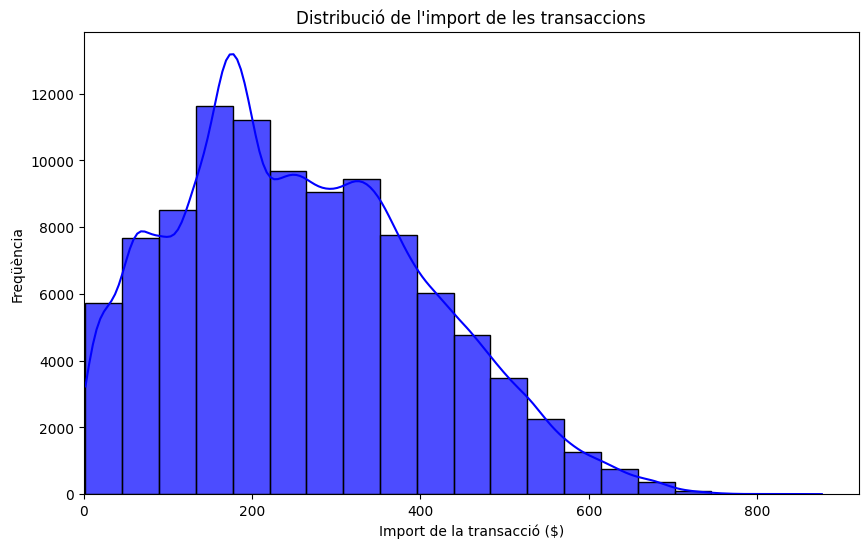

In [390]:
# Exemple de gràfic una variable numèrica :Relació entre el pes d'un producte i el seu preu

import matplotlib.pyplot as plt
import seaborn as sns
df_transactions_aprov=df_transactions[df_transactions['declined']==0] #filtrar només transaccions aprovades
plt.figure(figsize=(10,6))
sns.histplot(df_transactions_aprov["amount"], bins=20, color='blue', alpha=0.7, kde=True)
plt.title("Distribució de l'import de les transaccions")
plt.xlabel("Import de la transacció ($)")
plt.ylabel("Freqüència")
# Fixar els límits dels eixos
plt.xlim(left=0)  # eix X comença a 0
plt.ylim(bottom=0)  # eix Y comença a 0
plt.show()

El histograma mostra la distribució dels imports de les transaccions i  mostra asimetria positiva (cua a la dreta): la majoria de transaccions tenen imports baixos o mitjans, mentre que hi ha poques transaccions d’import molt elevat que allarguen la cua fins a valors propers als 800–900 $.

La línia KDE (Kernel Density Estimation  o Estimación de Densidad por Núcleo) d’un histograma és una estimació suau i contínua de la distribució de les dades que permet veure on es concentren més els valors i quina forma general té la distribució, sense dependre dels intervals del histograma, ja que representa una densitat de probabilitat amb una àrea total igual a 1.

La moda o  zona de major concentració es situa aproximadament entre 150 i 250 $, indicant que aquest és l’interval d’import més habitual.

Dispersió moderada-alta: tot i que la major part de dades es concentren en imports mitjans, hi ha una variabilitat notable, amb transaccions repartides des de valors molt baixos fins a imports elevats.

Transaccions altes poc freqüents: els imports superiors als 500–600 $ són relativament rars, però rellevants, ja que poden influir en mesures com la mitjana.

Conclusió: el comportament de les transaccions és típic d’un escenari comercial on predominen imports mitjans, amb algunes operacions puntuals d’alt valor. En aquest context, la mediana probablement representa millor el valor “típic” que no pas el promig o mitjana, que pot estar afectada pels valors extrems (distribució no normal).

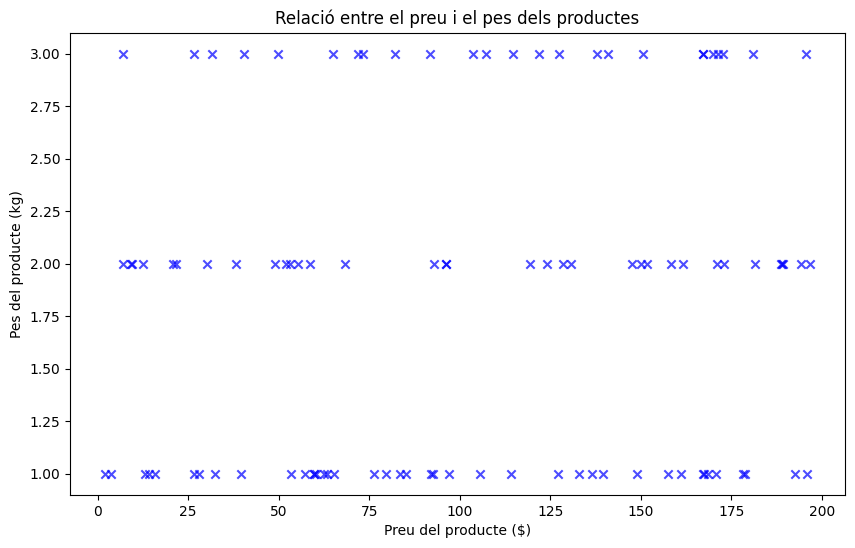

In [391]:
# Exemple de gràfic dues variables numèriques:Relació entre el pes d'un producte i el seu preu
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(x=df_product["price"], y=df_product["weight"], color='blue', alpha=0.7, marker='x')
plt.title("Relació entre el preu i el pes dels productes")
plt.xlabel("Preu del producte ($)")
plt.ylabel("Pes del producte (kg)")
plt.show()


El diagrama de dispersió Preu vs Pes dels productes mostra una relació inexistent entre preu i pes, donat que no s’observa una tendència clara (ni creixent ni decreixent). Productes amb el mateix pes poden tenir preus molt diferents, i viceversa (productes amb el mateix preu tenen pesos diferents).

Els pesos es concentren en valors concrets (1, 2 i 3; i jo assumeixo kg), cosa que indica categories de producte estandarditzades més que una variable contínua. No obstant, s'observa una alta variabilitat del preu dins de cada pes. Es a dir, per a cada nivell de pes, el preu oscil·la aproximadament entre valors baixos i alts (fins a ~200 $), suggerint que el preu depèn d’altres factors (marca, qualitat, tipus de producte, valor afegit, etc.). S'evidencia una absència de clusters de preu clars per pes: no hi ha una separació evident on, per exemple, els productes de 3 kg siguin sistemàticament més cars que els d’1 kg.

Conclusió: el pes no és un bon predictor del preu en aquest conjunt de dades. Per explicar o predir el preu caldria incorporar altres variables més rellevants (categoria, costos, marca, demanda, característiques del producte).

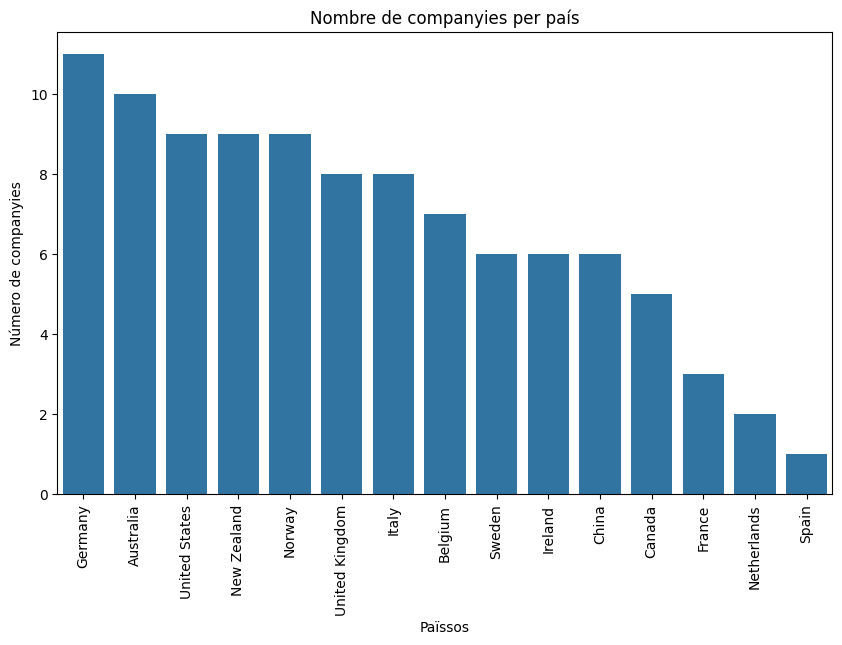

In [392]:
#Exemple de grafic amb una variable categòrica- Countplot: Nombre de companyies per país
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df_company, x="country", order=df_company['country'].value_counts().index)  # opcional: ordenar per categorias
plt.title("Nombre de companyies per país")
plt.xlabel("Païssos")
plt.ylabel("Número de companyies")

categories = df_company['country'].unique() # Obtenir les categories de l'eix x
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=90) # Posar les etiquetes a l'eix x (variable categòrica) i rotar-les per llegibilitat
plt.show()


El gràfic de barres representa el nombre de companyies per país i es pot interpretar de la manera següent:

a) Països amb més presència d’empreses: Alemanya lidera clarament amb el nombre més alt de companyies (11), seguida d’Austràlia (10). Aquests països concentren una part important de l’activitat empresarial del conjunt analitzat. (20% de les companyies)

b) Grup intermig: Estats units, Nova Zelanda, Noruega, Regne Unit i Itàlia mostren valors similars (8-9), indicant una presència rellevant però no dominant. Aquest grup reflecteix una distribució força equilibrada entre diversos països desenvolupats i tos respresenten un 43% de les companyies que facturen per SKycaster.

c) Presència moderada-baixa:Bèlgica (7), Suècia (6), Irlanda (6) i la Xina (6) tenen un nombre mitjà-baix de companyies, sense destacar especialment però amb participació significativa.

d) Països amb representació baixa: Canadà (5), França (3), Països Baixos (2) i sobretot Espanya (1) presenten el nombre més baix de companyies, cosa que indica una presència empresarial limitada en aquest conjunt de dades.

Conclusió: la distribució de companyies per país és desigual, amb una clara concentració en uns pocs països. Això pot reflectir diferències en mida de mercat (no sabem quin es el tamany de companyies per país), diferènces en l'atractiu econòmic dels diferents païssos, en la mostra analitzada o o en els criteris de selecció de les dades.

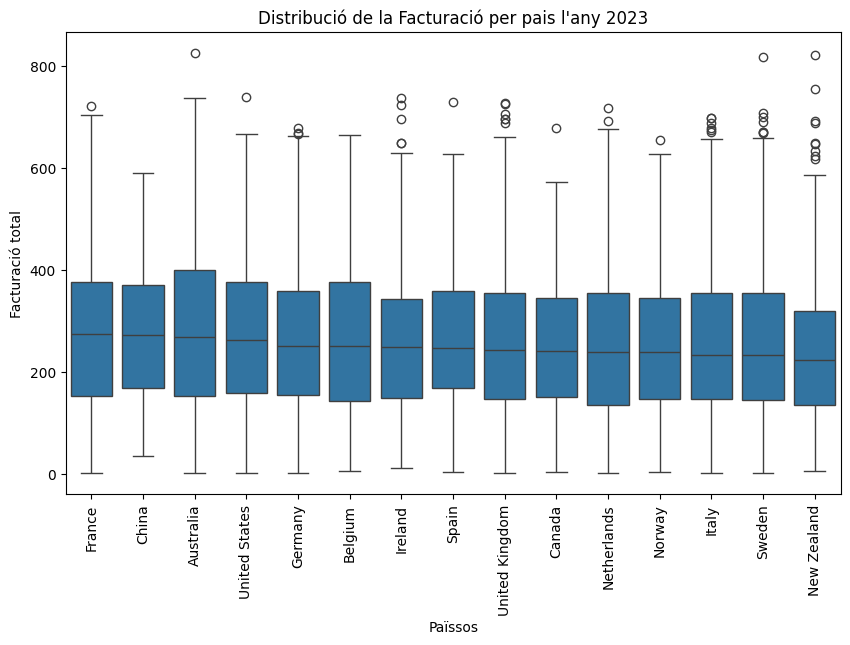

In [393]:
# Exemple de gràfic categòrica i numèrica - Boxplot: Facturació total per pais l'any 2023 tenint en compte la mediana i sense obviar outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Filtrar transaccions de l'any 2023 i unir amb dades de companyies
df_transaccions_2023=df_transactions_aprov[df_transactions_aprov['timestamp'].dt.year==2023]
df_tc=pd.merge(df_transaccions_2023, 
               df_company, 
               left_on='business_id', 
               right_on='id_company', 
               suffixes=('_transactions', '_company')) 

# Ordenar països segons la mediana de la facturació total
df_tc_mediana = (df_tc.groupby('country')['amount']
    .median()
    .reset_index(name='median_amount')
    .sort_values('median_amount', ascending=False))

sns.boxplot(x='country', y='amount', data=df_tc, order=df_tc_mediana['country'])
plt.title("Distribució de la Facturació per pais l'any 2023")
plt.xlabel("Païssos")
plt.ylabel("Facturació total")
plt.xticks(rotation=90)
plt.show()

En general, els diagrames de caixes es poden interpretar de la manera següent:
- Elements del boxplot: La caixa mostra el rang interquartílic (IQR), és a dir, el tram on es concentra el 50% central de les facturacions (entre el 25% i el 75%). 
- La línia central dins la caixa indica la mediana, que representa el valor habitual o central de la facturació per país. 
- Els bigotes s’estenen fins als valors mínim i màxim que no es consideren extrems. 
- Els punts fora de les bigotes corresponen a outliers, és a dir, transaccions amb imports excepcionalment elevats en comparació amb la resta.

Aquest boxplot representa la distribució de la facturació per país durant l’any 2023 ordenada segons la mediana de la facturació. Cada país disposa de la seva pròpia caixa, i permet observar com es distribueixen les facturacions de les transaccions al llarg de 2023. França és el país amb la mediana més elevada sense pràcticament outliers. Austràlia destaca per tenir una mediana elevada i un rang més ampli, fet que indica una major variabilitat en els imports facturats. Nova Zelanda presenta la mediana més baixa amb outliers destacables de valor més elevat, cosa que suggereix la presència puntual de transaccions molt altes. La majoria de països mostren medianes similars situades entre 200 i 270 unitats de facturació, segons l’eix vertical del gràfic. De manera global, per facturació de païssos al 2023 destaquem tres grups de païssos en funció de la seva facturació total ordenats segons la mediana de facturació:

a) Països amb facturació típica més elevada: França, la Xina, Austràlia i els Estats Units presenten les medianes més altes, cosa que indica que, de manera habitual, les transaccions realitzades en aquests països tenen imports superiors a la resta. Això suggereix mercats amb un nivell de facturació típicament més elevat. A més tenen menys valors outliers o extrems.

b) Grup intermig:Alemanya, Bèlgica, Irlanda, Espanya, el Regne Unit, Canadà i els Països Baixos mostren medianes molt similars, situades en valors intermedis. Aquest comportament indica una facturació relativament homogènia entre aquests països, sense diferències destacades en l’import habitual de les transaccions. Aquest païssos mostren més outliers que en el cas anterior

c) Països amb facturació típica més baixa: Noruega, Itàlia, Suècia i Nova Zelanda presenten medianes lleugerament inferiors, fet que suggereix que la facturació típica de les seves transaccions és menor en comparació amb la resta de països analitzats. En el cas de Nova Zelanda presenta la mediana més baixa, però amb outliers més destacables de valor més elevat, cosa que suggereix la presència puntual de transaccions molt altes. 

Variabilitat i dispersió: La majoria de països presenten una amplada de caixa similar, la qual cosa indica una dispersió comparable en la facturació. No obstant això, alguns països com Austràlia, França o Suècia mostren rangs més amplis, evidenciant una major variabilitat en els imports de les transaccions.

Presència d’outliers:En tots els països, excepte Bèlgica i Xina,s’observen outliers cap amunt, corresponents a transaccions puntuals amb imports molt elevats. Aquests valors extrems reflecteixen operacions excepcionals que poden incrementar notablement la facturació total, tot i no representar el comportament habitual del mercat.

Conclusió: 
En general, les diferències en la facturació típica (mediana) entre països no són extremes, fet que indica mercats relativament homogenis. L’ús de la mediana permet una comparació més robusta entre països, ja que redueix l’impacte dels outliers i reflecteix millor el nivell habitual de facturació durant l’any 2023.Alguns països presenten una facturació més homogènia, reflectida en caixes més estretes (Nova Zelanda), mentre que d’altres mostren una dispersió més gran, amb caixes i bigotes més amples (Austràlia). La presència d’outliers indica que, en determinats casos, s’han registrat vendes excepcionalment elevades, rellevants per a l’anàlisi de grans operacions o clients clau. L’ús de la mediana (en comptes de la mitja) permet comparar el nivell habitual de facturació entre països sense que aquests valors extrems distorsionin la visió general.

-- RESUM BOXPLOT ENTRE VARIABLE CATEGÒRICA I NUMÈRICA
- Usa MEDIANA quan:
Hi ha molta dispersió.
Hi ha outliers.
Vols comparar el comportament típic.
Anàlisi financera realista.

- Usa PROMIG quan:
Vols mesurar impacte econòmic.
Les dades són simètriques.
Els outliers són rellevants.

EL MATEIX EXEMPLE SENSE ORDENAR PER LA MEDIANA

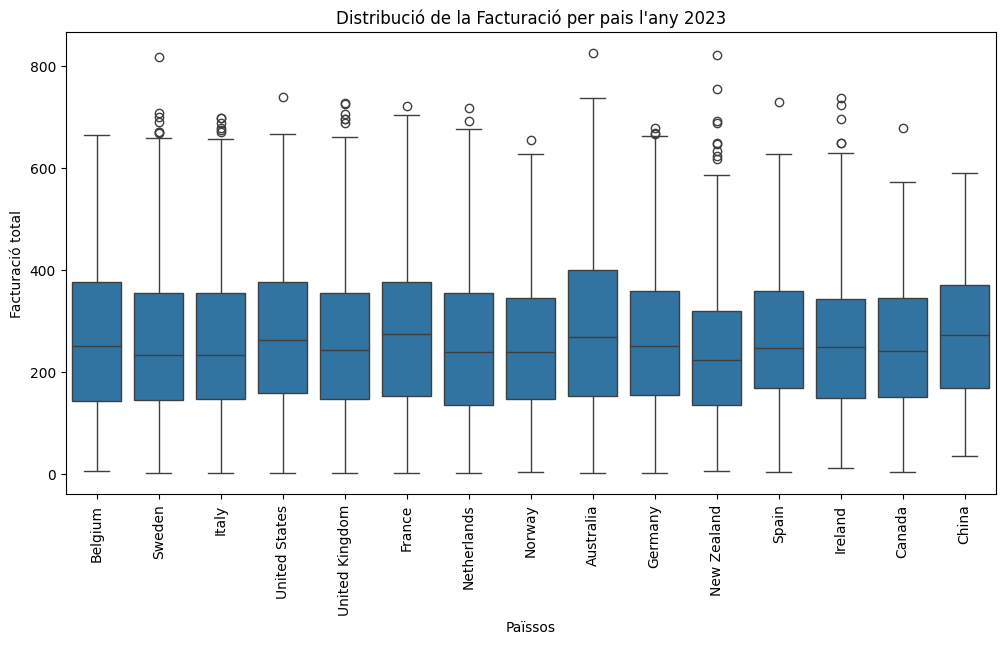

In [394]:
# Exemple de gràfic categòrica i numèrica - Barplot: Facturació total per pais en 2023 MEJOR BORRARLO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12,6))

# Filtrar transaccions de l'any 2023 i unir amb dades de companyies per crear el df_tc (transaccions + companyies)
df_transaccions_2023 = df_transactions_aprov[df_transactions_aprov['timestamp'].dt.year == 2023]
df_tc = pd.merge(df_transaccions_2023, 
                 df_company, 
                 left_on='business_id', 
                 right_on='id_company', 
                 suffixes=('_transactions', '_company')) #serveix per diferenciar columnes amb el mateix nom (en aquest cas no n'hi ha cap)

sns.boxplot(x='country', y='amount', data=df_tc)
plt.title("Distribució de la Facturació per pais l'any 2023")
plt.xlabel("Païssos")
plt.ylabel("Facturació total")
plt.xticks(rotation=90)
plt.show()

El gràfic de caixes (boxplot) mostra la distribució de la facturació de les transaccions per país durant l’any 2023, permetent analitzar no només els valors centrals sinó també la variabilitat i la presència de valors extrems.  
Conclusió: idèntica a l'anterior perque es el matix gràfic.

In [395]:
df_t_et = pd.merge(df_transactions_aprov, df_estat_targetes, 
                   left_on='card_id', 
                   right_on='card_id', 
                   suffixes=('_transactions', '_status'))

df_t_et_c = pd.merge(df_t_et, df_company, 
                     left_on='business_id', 
                     right_on='id_company', 
                     suffixes=('_transactions', '_company')
                     )


In [396]:
data2023 = df_t_et_c[df_t_et_c['timestamp'].dt.year == 2023]  #filtrar només l'any 2023 per fer les visualitzacions més endavant reduint la mida del dataframe

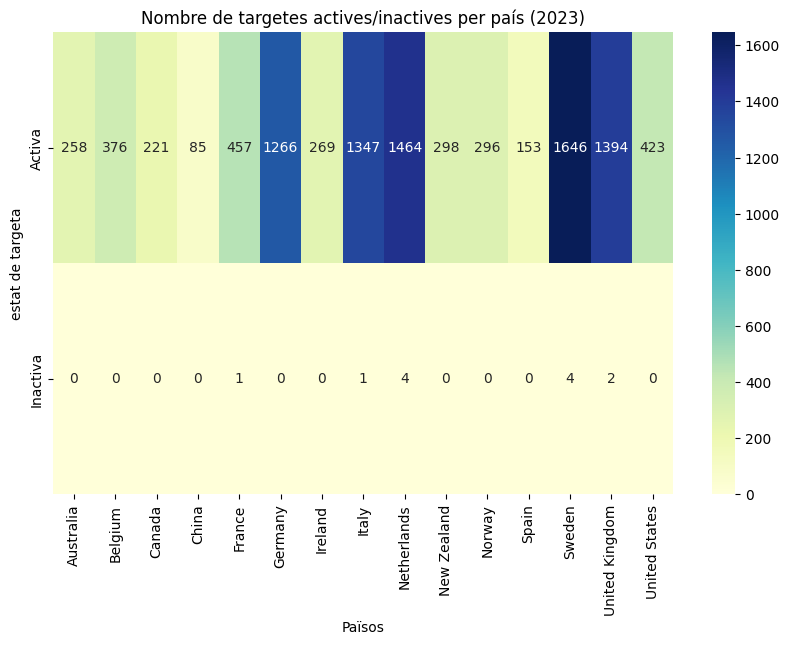

In [397]:
#Exemple de grafic recompte de dues variables categòriques (país i estat de la targeta): Heatmap nombre de targetes actives/inactives per país
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe=data2023[[ 'estat_targeta', 'country']]
df_contingencia = pd.crosstab(
    dataframe['estat_targeta'], 
    dataframe['country'])

# Gràfic de calor
plt.figure(figsize=(10,6))
sns.heatmap(df_contingencia, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Nombre de targetes actives/inactives per país (2023)")
plt.xlabel("Països")
plt.ylabel("estat de targeta")
plt.show()

El mapa de calor del nombre de targetes actives i inactives per país (2023) es pot interpretar així:

1️.- Predomini clar de targetes actives:
En tots els països analitzats, la gran majoria de targetes es troben en estat actiu. Els valors associats a targetes inactives són pràcticament inexistents, fet que indica una gestió eficient del cicle de vida dels clients, i un control adequat que evita la presència significativa de targetes inactives al sistema.

2️.- Països amb major volum de targetes actives:
Suècia encapçala clarament el rànquing, seguida de Països Baixos, Regne Unit, Itàlia i Alemanya. Aquests països presenten els colors més intensos del mapa, reflectint una elevada implantació i ús de targetes durant el 2023.

3️.- Països amb volum mitjà o baix:
França, Estats Units i Bèlgica mostren un nombre moderat de targetes actives.
Nova Zelanda, Noruega, Irlanda i Austràlia tenen volums més reduïts, mentre que Canadà, Espanya i la Xina concentren els valors més baixos del conjunt analitzat.

4️.- Absència d’indicadors d’anomalia:la presència de només 0–4 targetes inactives en alguns països suggereix processos puntuals de desactivació, o ajustos administratius menors. No s’observa cap concentració que pugui indicar problemes operatius o de control.

Conclusió: El mapa de calor reflecteix un sistema estable i ben gestionat, amb una clara prevalença de targetes actives i una presència gairebé nul·la de targetes inactives. L’activitat està fortament concentrada en determinats països europeus, mentre que altres mercats tenen un pes menor. Aquest tipus de visualització és útil per avaluar la distribució geogràfica de les targetes/clients i detectar possibles desviacions en la gestió operativa.

In [398]:
# Merge de tots els dataframes Company, transacctions i estat de les targetes fer les visualitzacions més endavant
datatotal = pd.merge(df_t_et, df_company, 
                     left_on='business_id', 
                     right_on='id_company', 
                     suffixes=('_transactions', '_company')
                     )



In [399]:
datatotal['declined'].unique() #sense les transaccions denegades

array([0])

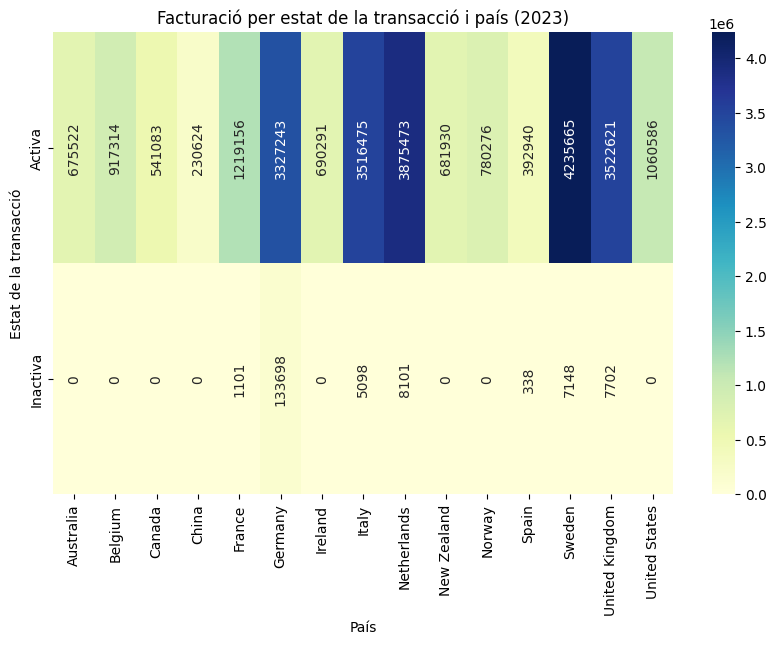

In [400]:
#Exemple de grafic tres variables combinades (dues variables categòriques y una numérica): Facturació per estat de la transacció i país
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))

dataframe = datatotal[['amount', 'estat_targeta', 'country']]

df_facturacio = pd.pivot_table(
    dataframe, 
    values='amount', 
    index='estat_targeta', 
    columns='country', 
    aggfunc='sum',
    fill_value=0)

sns.heatmap(
    df_facturacio,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    annot_kws={"rotation": 90})

plt.title("Facturació per estat de la transacció i país (2023)")
plt.xlabel("País")
plt.ylabel("Estat de la transacció")
plt.show()

El mapa de calor de la facturació per estat de la transacció i país (2023) es pot interpretar de manera similar així:

1️.- Predomini clar de la facturació activa
En tots els països analitzats, la facturació associada a transaccions actives és àmpliament majoritària. Els imports corresponents a transaccions inactives són residuals o inexistents en la majoria de casos, fet que indica que l’activitat econòmica registra un volum molt baix d’operacions anul·lades, cancel·lades o fora d’ús.

2️.- Països amb major volum de facturació activa: Suècia destaca clarament com el país amb més facturació, seguida dels Països Baixos, el Regne Unit, Itàlia i Alemanya. Aquests països presenten els colors més intensos del mapa de calor, reflectint una elevada concentració d’ingressos i una activitat comercial molt rellevant durant el 2023.

3️.- Països amb facturació mitjana o baixa: França, Estats Units, Bèlgica i Noruega mostren nivells intermedis de facturació activa. Austràlia, Irlanda i Nova Zelanda presenten imports més reduïts, mentre que Canadà, Espanya i la Xina concentren els valors més baixos del conjunt analitzat, indicant un pes menor en el volum global de facturació.

4️.- Facturació inactiva testimonial i sense anomalies: La facturació associada a transaccions inactives és molt baixa i només apareix puntualment en alguns països (com Alemanya, Itàlia, Països Baixos o el Regne Unit). Aquests imports són marginals i apunten a ajustos puntuals, correccions administratives o processos de tancament, sense evidència de problemes operatius o de control.

Conclusió: El mapa de calor mostra un ecosistema de facturació estable i saludable, amb una clara concentració dels ingressos en transaccions actives i una presència pràcticament nul·la d’operacions inactives. L’activitat econòmica es concentra principalment en determinats països europeus, mentre que altres mercats tenen un impacte més limitat. Aquesta visualització és especialment útil per analitzar la distribució geogràfica dels ingressos i detectar possibles desequilibris o oportunitats de creixement per país.

In [401]:
df_t_p= pd.merge(
         df_transactions_aprov, df_product, 
         left_on='product_id', 
         right_on='id_product', 
         suffixes=('_transactions', '_status')
         )
# Seleccionar només les variables numèriques per al pairplot 


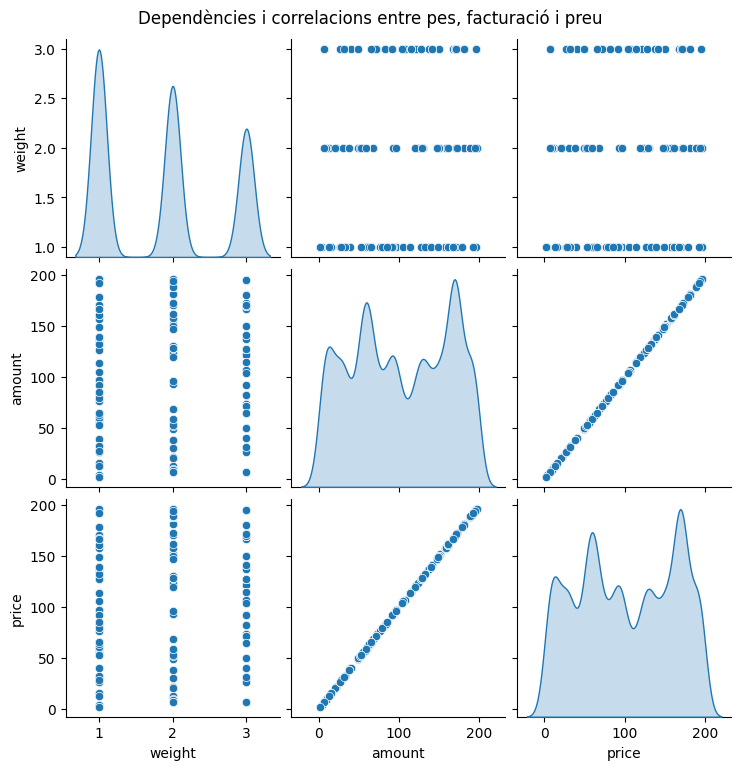

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar només les variables numèriques
df_pairplot = df_t_p[['weight', 'amount', 'price']]

# Crear el pairplot i el subtítol
g=sns.pairplot(df_pairplot, diag_kind='kde')
g.fig.suptitle('Dependències i correlacions entre pes, facturació i preu',y=1.02)

plt.show()



Aquest PAIRPLOT o Gràfic de parelles mostra totes les combinacions possibles de variables numèriques del Dataframe, normalment amb diagramees de dispersió per a cada parella i histogrames o densitats en la diagonal.  

La interpretació del pairplot de pes, facturació i preu és la següent:
1) Relació entre amount i price: Es veu una relació lineal perfecta (punts alineats en una recta). Això indica que: amount i price són pràcticament la mateixa informació, o un és una transformació directa de l’altre (per exemple price = amount). Conclusió: hi ha col·linealitat total entre amount i price. 

2) Relació entre weight i amount / price: No s’observa cap tendència clara. Els punts apareixen en bandes horitzontals perquè: weight només pren valors discrets (1, 2 i 3). Per a cada pes, els imports (amount i price) varien molt. Conclusió: el pes no explica el preu ni l’import en aquest conjunt de dades.

Distribució de les variables (diagonal):  
weight: distribució discreta en tres valors → categories de producte.  
amount i price: distribucions força homogènies dins l’interval aproximat 0–200, sense asimetries extremes ni outliers evidents.

Implicacions analítiques : Evitar usar amount i price junts en una regressió. Si l’objectiu és predir el preu, weight aporta poca informació. Caldrien altres variables explicatives (categoria, marca, país, etc.).

Conclusió final: Aquest pairplot mostra: redundància total entre amount i price, e independència pràctica entre el pes i les variables econòmiques.

# Nivell 2

1. Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

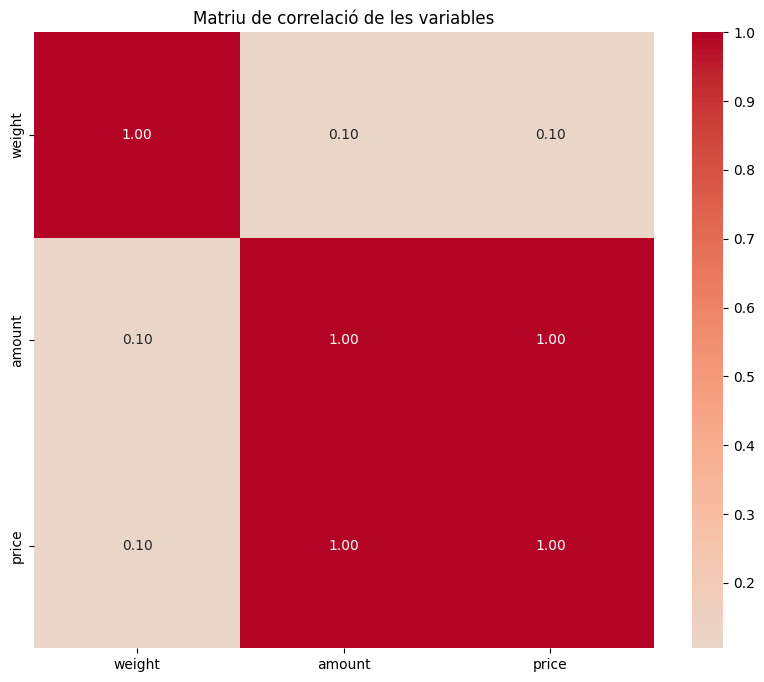

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriu de correlació (Pearson per defecte)
df_pairplot = df_t_p[['weight', 'amount', 'price']]
corr_matrix = df_pairplot.corr()

corr_matrix

plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)

plt.title("Matriu de correlació de les variables")
plt.show()

Tal com ja havíem observat en el gràfic de parelles numèriques, existeix una correlació perfecta entre el preu i la facturació. No obstant això, la correlació entre el pes i la facturació, així com entre el pes i el preu, és molt feble.

2. Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

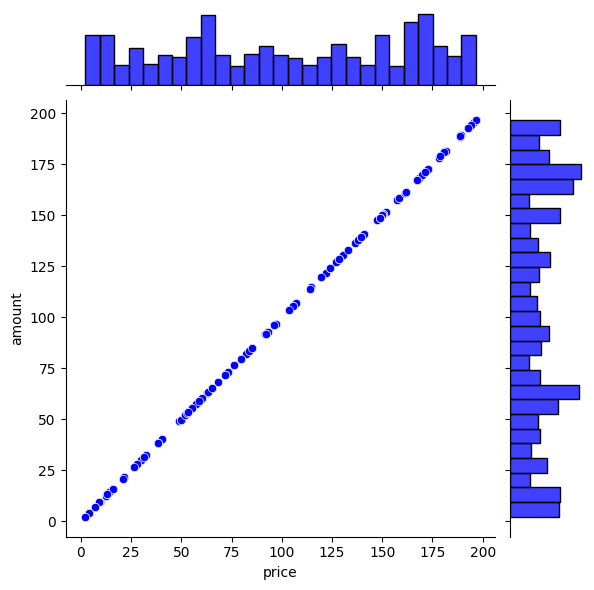

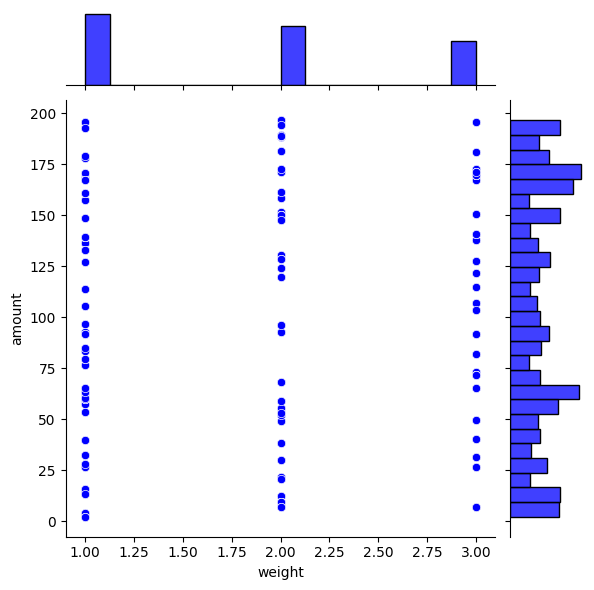

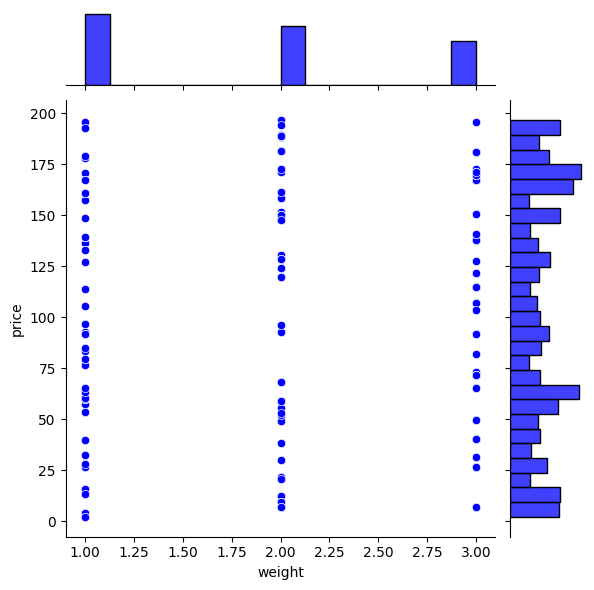

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Seleccionar només les variables numèriques
df_pairplot = df_t_p[['amount','weight','price']]

# Crear el jointplot
sns.jointplot(x='price', y='amount', data=df_pairplot, kind='scatter', color='blue')
sns.jointplot(x='weight', y='amount', data=df_pairplot, kind='scatter', color='blue')
sns.jointplot(x='weight', y='price', data=df_pairplot, kind='scatter', color='blue')

plt.show()

D’acord amb el que ja hem vist, el jointplot entre pes, facturació i preu s’interpretaria així:

1) El jointplot entre preu i facturació mostra una relació lineal molt clara i concentrada al voltant d’una recta, confirmant l’existència d’una correlació perfecta entre aquestes dues variables.

2) En canvi, els jointplots que inclouen el pes (pes–facturació i pes–preu) presentarien una dispersió dels punts al voltant de tres valor discrets (1, 2 i 3), la qual cosa indica una correlació molt feble o pràcticament inexistent, i reforça la idea que el pes no és un bon predictor d’aquestes variables.

En conjunt, el jointplot permet visualitzar de manera clara que el preu explica la facturació, mentre que el pes té un impacte molt limitat o practicament nul.

# Nivell 3

1. Transfereix totes les visualitzacions del Nivell 1 a Power BI utilitzant scripts de Python.

- Una variable numèrica. HISTOGRAMA: -- Distribució de l'import de les transaccions
- Dues variables numèriques.  DIAGRAMA DISPERSION (Scattering)-- Relació entre el preu i el pes dels productes
- Una variable categòrica.  BARRAS (Countplot) -- Nombre de companyies per país
- Una variable categòrica i una numèrica.  BARRAS (Barplot) -- Distribució de la Facturació per pais l'any 2023
- Dues variables categòriques.  HEATMAP -- Nombre de targetes actives/inactives per país (2023)
- Tres variables combinades.  HEATMAP -- Facturació per estat de la transacció i país (2023)
- Crea un Pairplot --  Dependències i correlacions entre pes, facturació i preu


IMPORTANT COMPROBAR QUE LES RELACIONS ENTRE TAULES SON BIDIRECCIONALS I QUE LES VARIABLES NUMÈRIQUES ES CARREGUEN CORRECTAMENT EN POWER BI MALGRAT QUE HAGUEM FET LES TRANSFORMACIONS EN PYTHON